###Ramda Yanurzha - ry692@nyu.edu

#TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:



##Task 1
###Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it and figure out what it is due to.

In [24]:
import pandas as pd
import sys
import os
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
mta = np.load('MTA_Fare.npy')
mta.shape

(600, 23, 194)

In [26]:
mta = np.where(mta!=-1,mta,np.nan)

In [27]:
mta

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [91]:
mta_allsum = np.nansum(mta, axis=1)/23
mta_allsum = np.transpose(mta_allsum)
print (mta_allsum.shape)

(194, 600)


In [92]:
mtadf = pd.DataFrame(mta_allsum)

In [93]:
mtadf.index = pd.Index(pd.date_range("2010-05-21", "2014-02-8", freq="W"))

In [94]:
mtadf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2010-05-23,5516.434783,1622.000000,287.217391,712.086957,807.130435,869.000000,541.260870,482.217391,455.739130,6399.434783,...,0,0,0,0,0,0,0,0,0,0
2010-05-30,6499.000000,2020.173913,299.173913,756.869565,865.347826,896.739130,593.217391,506.913043,479.565217,6731.565217,...,0,0,0,0,0,0,0,0,0,0
2010-06-06,6625.347826,2146.043478,314.304348,765.000000,867.304348,922.826087,596.478261,523.347826,473.086957,6780.782609,...,0,0,0,0,0,0,0,0,0,0
2010-06-13,6964.130435,1949.956522,249.173913,619.217391,698.956522,757.043478,498.260870,426.478261,396.652174,6735.391304,...,0,0,0,0,0,0,0,0,0,0
2010-06-20,7071.347826,1804.739130,305.739130,764.739130,881.869565,909.086957,612.782609,519.304348,474.913043,6853.391304,...,0,0,0,0,0,0,0,0,0,0
2010-06-27,6800.608696,1550.173913,222.043478,572.521739,634.826087,677.782609,447.608696,373.304348,348.565217,6533.000000,...,0,0,0,0,0,0,0,0,0,0
2010-07-04,6919.826087,1825.608696,239.000000,630.869565,702.217391,747.260870,500.173913,424.956522,389.695652,6742.695652,...,0,0,0,0,0,0,0,0,0,0
2010-07-11,6929.304348,1822.130435,246.434783,625.565217,698.521739,734.652174,500.826087,419.608696,375.173913,6820.826087,...,0,0,0,0,0,0,0,0,0,0
2010-07-18,7099.347826,1791.913043,241.521739,618.304348,704.565217,737.043478,497.782609,427.000000,384.521739,6776.043478,...,0,0,0,0,0,0,0,0,0,0
2010-07-25,6924.000000,1788.782609,301.826087,746.956522,853.000000,894.043478,588.956522,502.956522,459.913043,6826.521739,...,0,0,0,0,0,0,0,0,0,0


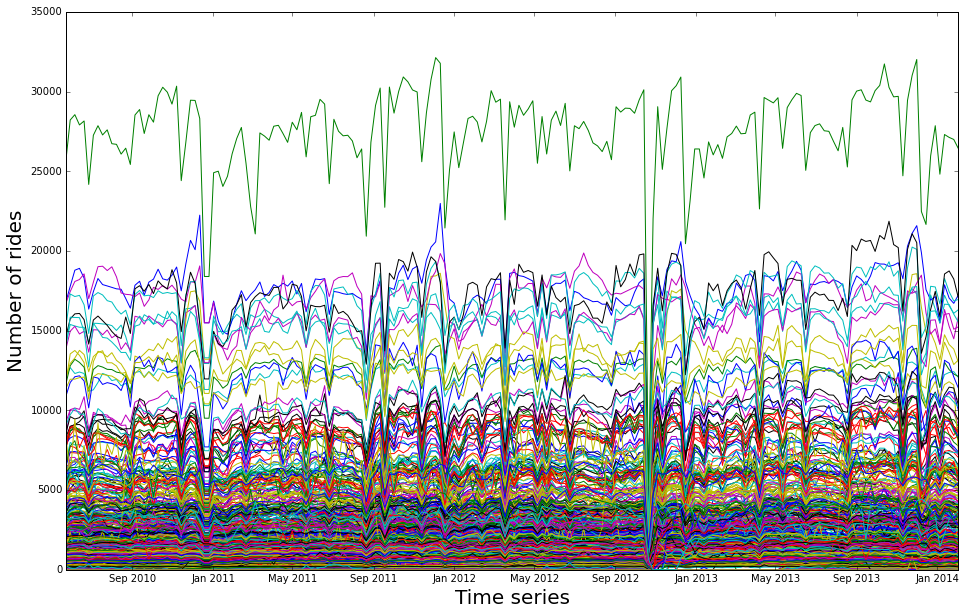

In [159]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(mtadf.index,mtadf);
pl.xlabel("Time series", fontsize=20)
pl.ylabel("Number of rides", fontsize=20)

In [157]:
thresholds = [mtadf[0].mean() + 3*mtadf[0].std(), 
              mtadf[0].mean() - 3*mtadf[0].std()]
print (thresholds)
min(mtadf.index)

[10029.725109332805, 351.22872302936685]


Timestamp('2010-05-23 00:00:00', offset='W-SUN')

###Comment

There is a sharp drop in all stations on around October 2012. This is caused by Hurricane Sandy that flooded the subways and makes the system inoperative.

##Task 2: 
###Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [98]:
mta_2 = np.nansum(mta, axis=0)/600
mta_2 = np.transpose(mta_2)
print (mta_2.shape)
mtadf2 = pd.DataFrame(mta_2)
mtadf2.index = pd.Index(pd.date_range("2010-05-21", "2014-02-8", freq="W"))
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
mtadf2.columns = ridetype
mtadf2.head(10)

(194, 23)


,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-23,19157.691667,884.206667,79.668333,310.918333,78.013333,6162.405000,14253.228333,16.771667,555.328333,853.386667,...,205.223333,1316.850000,99.681667,47.035000,0.000000,207.821667,35.100000,10.213333,0.596667,0
2010-05-30,20878.098333,972.555000,85.810000,332.048333,107.255000,6636.346667,15810.656667,19.745000,471.258333,963.371667,...,253.246667,1513.446667,115.348333,53.888333,0.000000,202.855000,36.116667,10.200000,0.790000,0
2010-06-06,21277.711667,976.990000,86.060000,332.780000,94.990000,6721.716667,15794.230000,20.461667,503.380000,1025.895000,...,252.563333,1523.540000,115.956667,54.363333,0.000000,203.635000,35.721667,10.816667,0.775000,0
2010-06-13,21089.458333,937.670000,86.771667,327.315000,62.381667,6721.255000,15750.135000,18.701667,509.188333,1010.450000,...,245.156667,1504.248333,113.498333,54.006667,0.000000,203.418333,36.050000,10.983333,0.806667,0
2010-06-20,21349.490000,914.763333,85.255000,324.805000,58.683333,6542.410000,15490.003333,17.525000,559.633333,939.076667,...,229.813333,1425.955000,110.628333,53.221667,0.293333,199.626667,33.828333,10.521667,0.753333,0
2010-06-27,19049.638333,759.485000,78.086667,292.746667,78.081667,6105.240000,13811.338333,17.136667,577.805000,900.925000,...,185.708333,1217.551667,90.056667,45.781667,0.001667,189.498333,33.000000,10.263333,0.763333,0
2010-07-04,20578.128333,863.645000,81.605000,314.111667,100.375000,6530.173333,15452.355000,18.935000,517.311667,1019.936667,...,234.886667,1397.716667,109.391667,53.441667,0.003333,191.338333,34.693333,11.321667,0.891667,0
2010-07-11,20961.265000,855.686667,82.715000,313.483333,79.065000,6713.751667,15510.958333,18.250000,576.203333,1089.785000,...,230.125000,1408.711667,108.918333,53.598333,0.005000,200.488333,35.828333,11.970000,0.878333,0
2010-07-18,20728.525000,853.653333,81.716667,311.370000,53.473333,6717.861667,15243.086667,17.871667,580.948333,1097.928333,...,227.048333,1387.058333,106.776667,52.140000,0.000000,205.963333,36.033333,11.860000,0.838333,0
2010-07-25,20718.761667,870.948333,83.960000,317.546667,86.951667,6720.566667,14843.528333,17.623333,607.271667,1086.223333,...,224.501667,1372.060000,105.010000,52.666667,7.263333,209.698333,35.813333,12.288333,0.843333,0


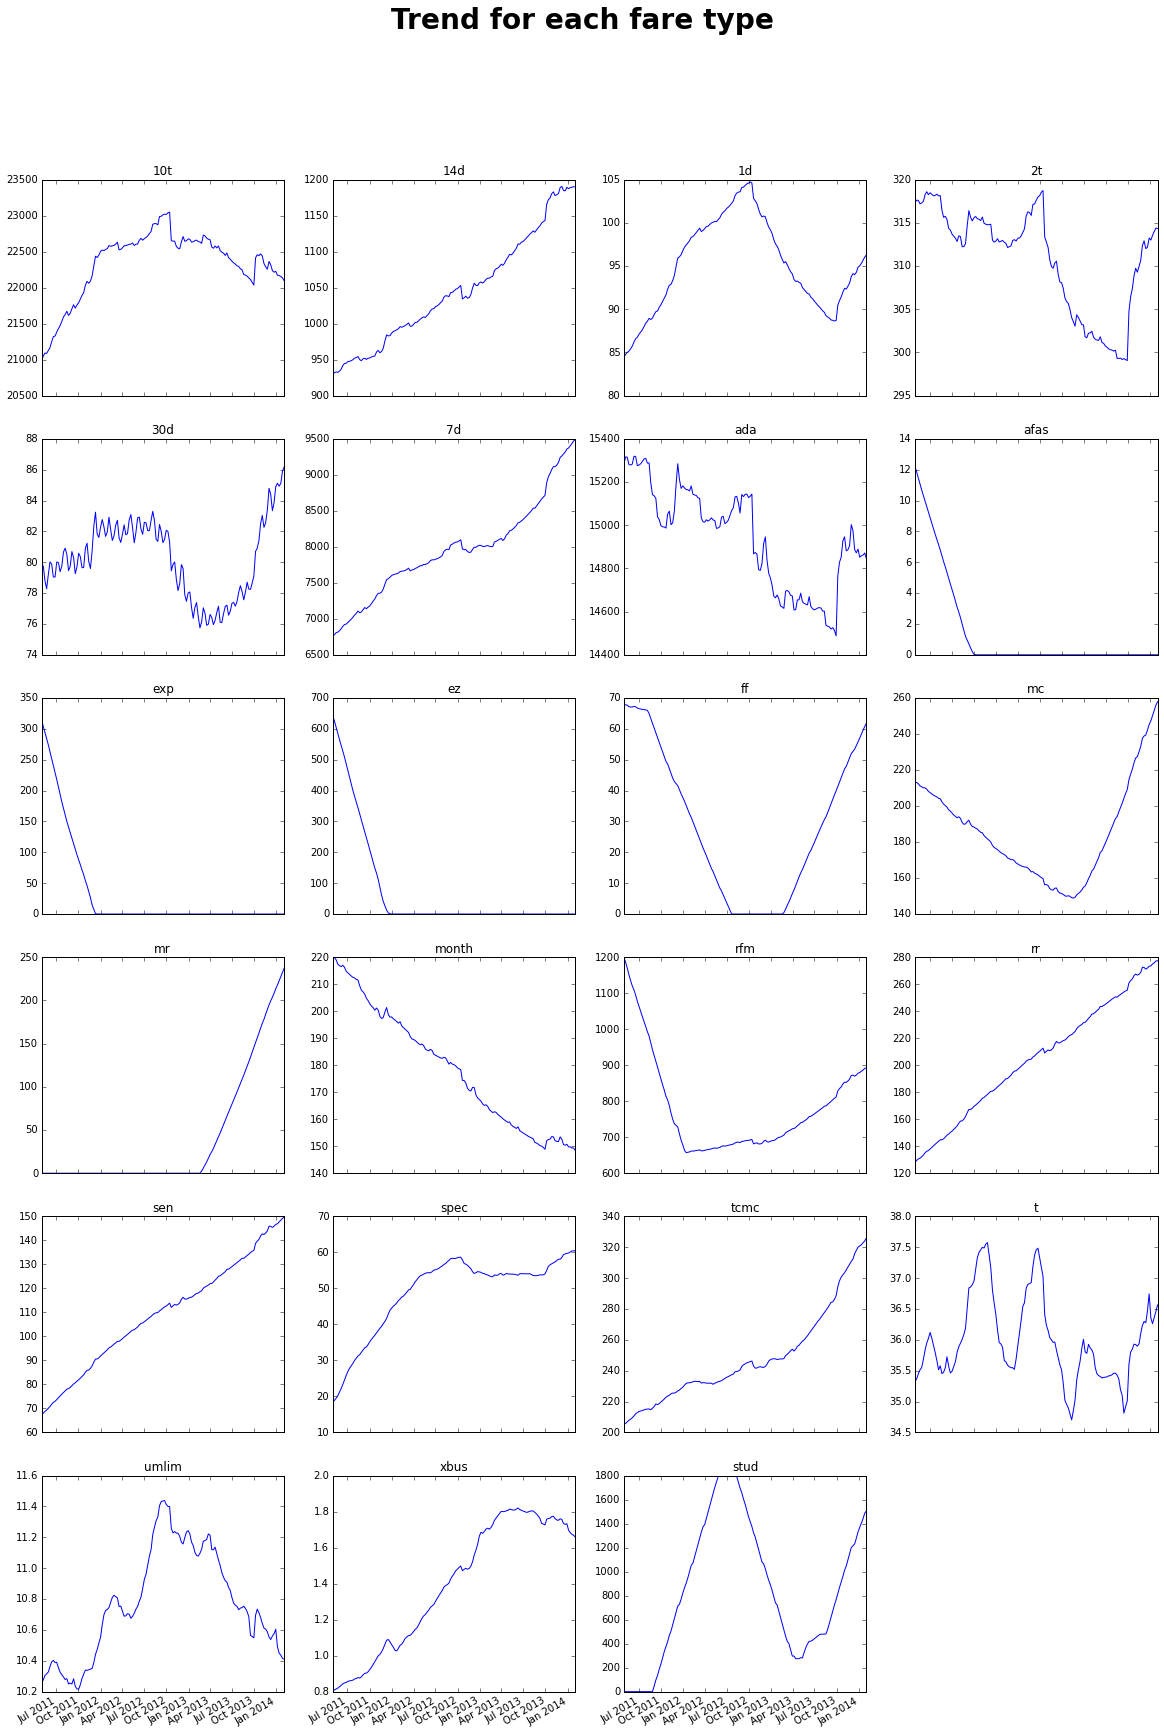

In [119]:
fig2 = plt.figure(figsize=(20,30))
fig2.suptitle('Trend for each fare type', fontsize=28, fontweight='bold')
x = 0
for i in ridetype:
    y = pd.rolling_mean(mtadf2[i],50)
    ax = fig2.add_subplot(6,4,x+1)
    ax.plot(mtadf2.index,y);
    ax.set_title(i)
    ax = fig2.autofmt_xdate()
    x = x+1

ratio_arr = {}
for i in ridetype:
    usage_f10 = pd.DataFrame.mean(mtadf2[i].head(10))
    usage_l10 = pd.DataFrame.mean(mtadf2[i].tail(10))
    if (usage_f10 == 0 or usage_l10 == 0):
        ratio = "undetermined"
    else:
        ratio = str(usage_l10 / usage_f10)
    ratio_arr[i] = ratio




###Comment

Based on visual inspection, fare types that experienced steady increases are: **14d, 7d, rr, sen, tcmc**. Fare types with steady decrease: **month**.

In [120]:
fare_increase = ['14d','7d','rr','sen','tcmc']
fare_decrease = ['month']
print ("fares with steady increase")
for i in fare_increase:
    print ("ratio of " + i + " : " + ratio_arr[i])
print ("fares with steady decrease")
for i in fare_decrease:
    print ("ratio of " + i + " : " + ratio_arr[i])

fares with steady increase
ratio of 14d : 1.2520650527713835
ratio of 7d : 1.389747603616559
ratio of rr : 2.592959885919772
ratio of sen : 2.9093967688393576
ratio of tcmc : 1.5322710626953695
fares with steady decrease
ratio of month : 0.5787223845636156


##Task 3

###Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [143]:
ft = np.abs(np.fft.rfft(mta_allsum[193]))
N = mta_allsum[193].size
fft = np.fft.rfftfreq(N, 1.0)
print (ft.shape)
print (fft.shape)

(301,)
(301,)


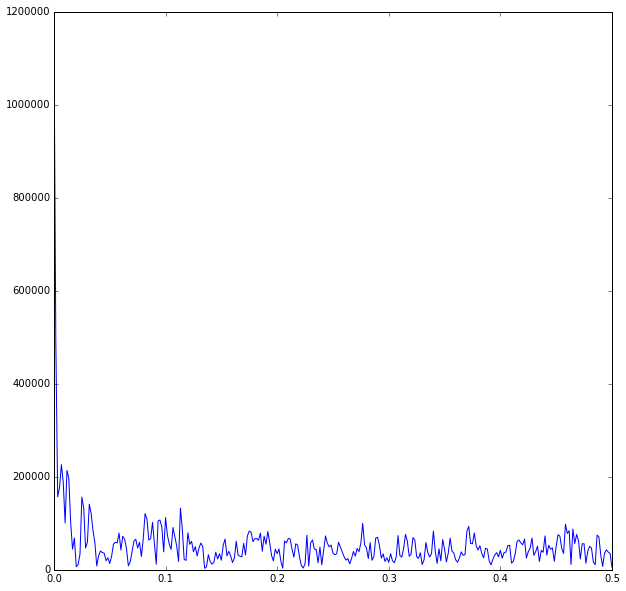

In [140]:
figf = pl.figure(figsize=(10,10))
ax=figf.add_subplot(111)
ax.plot(fft,ft,'-')